# COMMON TOOLS FOR DATA SCIENCE

## 读取数据

In [101]:
from data_preprocessing.loader import load_data

df, info = load_data(r'../executable/2025-Project-Data(ESM Table 1).csv')
print(df.head())
print(f"Info: {info}")

          Label           Deposit   SiO2  TiO2  Al2O3  TFe2O3   MnO   MgO  \
0  Au-rich PCDs  Oyu Tolgoi Cu-Au  65.37  0.60  17.98    5.39  0.12  1.53   
1  Au-rich PCDs  Oyu Tolgoi Cu-Au  57.42  0.58  17.77    5.19  0.19  1.48   
2  Au-rich PCDs  Oyu Tolgoi Cu-Au  63.10  0.33  16.61    3.78  0.08  0.73   
3  Au-rich PCDs  Oyu Tolgoi Cu-Au  65.13  0.31  16.21    3.68  0.10  0.79   
4  Au-rich PCDs  Oyu Tolgoi Cu-Au  64.38  0.35  17.36    3.74  0.04  0.82   

    CaO  Na2O  ...    Dy    Ho    Er    Tm    Yb    Lu   Hf    Ta    Th     U  
0  3.89  4.92  ...  3.35  0.63  1.93  0.27  2.00  0.32  3.0  0.40  2.63  1.54  
1  4.52  5.48  ...  3.30  0.70  2.10  0.30  2.10  0.30  3.0  0.50  3.00  1.30  
2  1.96  4.91  ...  1.91  0.40  1.26  0.21  1.54  0.28  2.4  0.34  2.81  1.71  
3  1.97  4.99  ...  1.90  0.40  1.25  0.20  1.46  0.25  2.5  0.34  2.63  1.32  
4  1.60  5.61  ...  2.07  0.43  1.32  0.22  1.59  0.28  2.4  0.30  2.38  1.54  

[5 rows x 36 columns]
Info: CSV 文件 ../executable/2025-Pr

## 设置单位

In [102]:
# 1. 定义单位映射
expected_units = {
    # Major oxides (wt%)
    'SiO2':  'wt%',
    'TiO2':  'wt%',
    'Al2O3':'wt%',
    'TFe2O3':'wt%',
    'MnO':   'wt%',
    'MgO':   'wt%',
    'CaO':   'wt%',
    'Na2O':  'wt%',
    'K2O':   'wt%',
    'P2O5':  'wt%',
    # Trace elements (ppm)
    'Rb':  'ppm',  'Sr':  'ppm',  'Y':   'ppm',  'Zr':  'ppm',
    'Nb':  'ppm',  'Ba':  'ppm',  'La':  'ppm',  'Ce':  'ppm',
    'Pr':  'ppm',  'Nd':  'ppm',  'Sm':  'ppm',  'Eu':  'ppm',
    'Gd':  'ppm',  'Tb':  'ppm',  'Dy':  'ppm',  'Ho':  'ppm',
    'Er':  'ppm',  'Tm':  'ppm',  'Yb':  'ppm',  'Lu':  'ppm',
    'Hf':  'ppm',  'Ta':  'ppm',  'Th':  'ppm',  'U':   'ppm'
}

# 2. 为每一列设置 attrs['unit']
for col, unit in expected_units.items():
    if col in df.columns:
        df[col].attrs['unit'] = unit

# 3. 验证设置是否成功
for col in expected_units:
    if col in df.columns:
        print(f"{col}: unit = {df[col].attrs.get('unit')}")

SiO2: unit = wt%
TiO2: unit = wt%
Al2O3: unit = wt%
TFe2O3: unit = wt%
MnO: unit = wt%
MgO: unit = wt%
CaO: unit = wt%
Na2O: unit = wt%
K2O: unit = wt%
P2O5: unit = wt%
Rb: unit = ppm
Sr: unit = ppm
Y: unit = ppm
Zr: unit = ppm
Nb: unit = ppm
Ba: unit = ppm
La: unit = ppm
Ce: unit = ppm
Pr: unit = ppm
Nd: unit = ppm
Sm: unit = ppm
Eu: unit = ppm
Gd: unit = ppm
Tb: unit = ppm
Dy: unit = ppm
Ho: unit = ppm
Er: unit = ppm
Tm: unit = ppm
Yb: unit = ppm
Lu: unit = ppm
Hf: unit = ppm
Ta: unit = ppm
Th: unit = ppm
U: unit = ppm


## 数据校验

In [103]:
from data_preprocessing.validator import verify_dtype

valid, error_location, info = verify_dtype(df, {"SiO2": "float64",})

print(f"Schema valid: {valid}")
print(f"Error location: {error_location}")
print(f"Info: {info}")

Schema valid: True
Error location: {}
Info: 所有列 dtype 与预期一致


In [104]:
from data_preprocessing.validator import verify_units

valid, error_location, info = verify_units(df, {"SiO2": 'wt%',})

print(f"Schema valid: {valid}")
print(f"Error location: {error_location}")
print(f"Info: {info}")

ImportError: cannot import name 'verify_units' from 'data_preprocessing.validator' (/home/sethome/Desktop/data-science-project/code/data_preprocessing/validator.py)

## 缺失值处理

In [5]:
from data_preprocessing.validator import handle_missing_values

df_miss, info = handle_missing_values(df, method='zero')

print(f"Missing values handled: {df_miss.isnull().sum()}")
print(f"Info: {info}")

Missing values handled: Label      0
Deposit    0
SiO2       0
TiO2       0
Al2O3      0
TFe2O3     0
MnO        0
MgO        0
CaO        0
Na2O       0
K2O        0
P2O5       0
Rb         0
Sr         0
Y          0
Zr         0
Nb         0
Ba         0
La         0
Ce         0
Pr         0
Nd         0
Sm         0
Eu         0
Gd         0
Tb         0
Dy         0
Ho         0
Er         0
Tm         0
Yb         0
Lu         0
Hf         0
Ta         0
Th         0
U          0
dtype: int64
Info: 缺失值处理完成，使用方法: zero


## CLR 变换

In [6]:
from data_preprocessing.transform import clr_transform

df_clr, info = clr_transform(df, ["SiO2", "TiO2", "Al2O3", "TFe2O3", "MnO", "MgO", "CaO", "Na2O", "K2O", "P2O5"])
print(f"CLR transformed data: {df_clr.head()}")
print(f"Info: {info}")

CLR transformed data:    clr_SiO2  clr_TiO2  clr_Al2O3  clr_TFe2O3   clr_MnO   clr_MgO   clr_CaO  \
0  0.016901  0.339762   0.111819    0.373189  0.912696  0.045828  0.221817   
1 -0.112769  0.305860   0.100071    0.335377  1.372228  0.012602  0.371920   
2 -0.018441 -0.258075   0.032564    0.018368  0.507230 -0.694151 -0.463648   
3  0.013223 -0.320596   0.008188   -0.008444  0.730374 -0.615162 -0.458559   
4  0.001641 -0.199235   0.076728    0.007729 -0.185917 -0.577891 -0.666589   

   clr_Na2O   clr_K2O  clr_P2O5  
0  0.269416  0.284446  0.413971  
1  0.377213  0.284446  0.531754  
2  0.267382  0.519657 -0.199133  
3  0.283544  0.355354 -0.279176  
4  0.400659  0.473137 -0.279176  
Info: CLR 变换完成


## 异常值标记

In [7]:
from data_preprocessing.validator import flag_outliers

df_proc, info = flag_outliers(df_clr, z_thresh=3.0)
# 找出所有 outlier 列名
outlier_cols = [c for c in df_proc.columns if c.startswith('outlier_')]
# 如果任意一列为 True，就保留该行
mask = df_proc[outlier_cols].any(axis=1)
# 应用掩码
outliers = df_proc[mask]
print(f"Outliers flagged: {outliers}")
# 符合条件的行数
print(f"Number of outliers: {len(outliers)}")
print(f"Info: {info}")

Outliers flagged:      clr_SiO2  clr_TiO2  clr_Al2O3  clr_TFe2O3    clr_MnO   clr_MgO   clr_CaO  \
7    0.080321 -0.921369  -0.425114    0.896918  -0.185917 -0.495974 -1.935100   
16  -0.117308  0.157440  -0.060101    0.905671   0.373699  0.719172 -0.881950   
17   0.082902 -0.663540  -0.222542   -0.734743   0.037227 -0.615162 -1.198468   
60   0.062211  0.177243  -0.259744    0.163407  -1.572211  0.272885 -1.116790   
89   0.157255 -0.458746  -0.139098   -1.547079  -0.879064 -0.653877 -2.004093   
104  0.038541 -0.228222  -0.013641   -0.310724 -17.690307 -0.050136 -0.147051   
110  0.106396 -0.921369  -0.050896   -1.509807 -17.690307 -1.321049 -2.650720   
114  0.083761 -0.864211  -0.044373   -1.891175  -0.473599 -1.401091 -0.147051   
121  0.068768 -0.619089  -0.295873   -0.105386   0.219548  0.019336  0.683106   
123  0.044809 -0.576529  -0.371397    0.261418   0.625014  0.168681  0.674970   
124  0.041232 -0.535707  -0.235839    0.047053   0.373699  0.077985  0.641744   
129  0.098

## 可视化

KeyError: 'K2O'

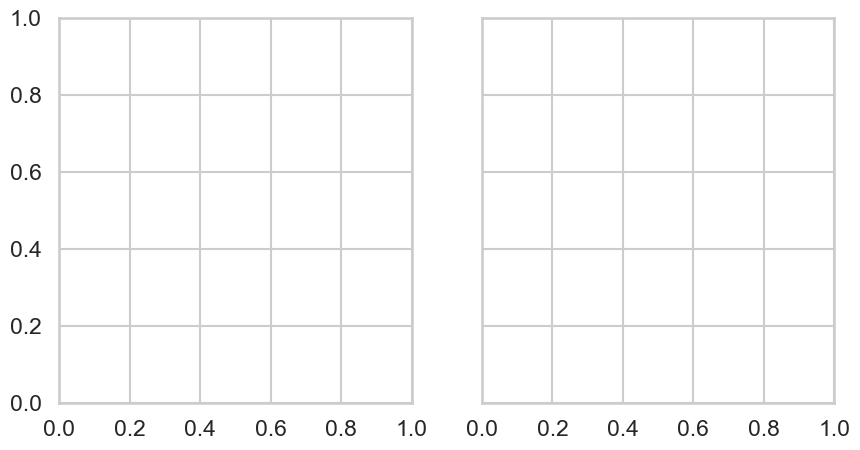

In [8]:
import pandas as pd

from visualization.plot import (
    plot_scatter_matrix,
    plot_correlation_heatmap,
    plot_pca_biplot,
    plot_ratio_diagrams
)

df_clr = pd.concat([df_clr, df[['Label']].reset_index(drop=True)], axis=1)

# 选择要可视化的 10 个元素
elements = ['SiO2','TiO2','Al2O3','TFe2O3','MnO','MgO','CaO','Na2O','K2O','P2O5']

# 1. Pair-wise Scatter-Matrix
fig1 = plot_scatter_matrix(df_clr, elements, label_col='Label')
fig1.savefig("../result/fig1_scatter_matrix.png", dpi=300, bbox_inches='tight')

# 2. Correlation Heat-map (Pearson & Spearman)
fig2 = plot_correlation_heatmap(df_clr, elements, method='pearson')
fig2.savefig("../result/fig2_heatmap_pearson.png", dpi=300, bbox_inches='tight')

fig3 = plot_correlation_heatmap(df_clr, elements, method='spearman')
fig3.savefig("../result/fig3_heatmap_spearman.png", dpi=300, bbox_inches='tight')

# 3. PCA Bi-plot (PC1 vs PC2)
fig4 = plot_pca_biplot(df_clr, elements, label_col='Label')
fig4.savefig("../result/fig4_pca_biplot.png", dpi=300, bbox_inches='tight')

# 4. Geochemical Ratio Diagrams
ratios = [('K2O','Na2O'), ('Sr','Y')]
fig5 = plot_ratio_diagrams(df_clr, ratios, against='SiO2')
fig5.savefig("../result/fig5_ratio_diagrams.png", dpi=300, bbox_inches='tight')

# Random Forest
对CLR变换后和未变化的结果，同时进行随机森林分类（使用相同的树数量），并对比结果

结果表明随机森林分类似乎对数据的对数变换不敏感。

In [100]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_clr.drop(['Label', 'Deposit'], axis=1)
y = df_clr['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('CLR 清理后的分类结果：\n', classification_report(y_test, y_pred))

X = df.drop(['Label', 'Deposit'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('CLR 未清理的分类结果：\n', classification_report(y_test, y_pred))

CLR 清理后的分类结果：
               precision    recall  f1-score   support

Au-rich PCDs       0.85      0.76      0.80        29
Cu-rich PCDs       0.89      0.93      0.91        60

    accuracy                           0.88        89
   macro avg       0.87      0.85      0.86        89
weighted avg       0.87      0.88      0.87        89

CLR 未清理的分类结果：
               precision    recall  f1-score   support

Au-rich PCDs       0.84      0.90      0.87        29
Cu-rich PCDs       0.95      0.92      0.93        60

    accuracy                           0.91        89
   macro avg       0.89      0.91      0.90        89
weighted avg       0.91      0.91      0.91        89

